In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
titanic_data=pd.read_csv('/Users/riju/Desktop/IIM_Calcutta_Study/IIMC_Study/EXTRAS !/CPBA/analytics/Projects/pyanalytics/dataset_ML_DVCES1.csv')


In [3]:
titanic_data.columns

es1=titanic_data

es1

#data analysis


,Machine/Spares,Vendor name,lifespan,price,greater than 5 years,procurement year
0,xyz,abc,1479,214151,0,2013
1,xyz,def,86,201187,0,2013
2,xyz,def,926,238283,0,2009
3,xyz,abc,3159,353452,1,2016
4,xyz,efg,2744,363646,1,2011
5,xyz,def,608,238283,0,2014
6,xyz,abc,741,393237,0,2010
7,xyz,efg,1451,296174,0,2013
8,xyz,hij,854,48054,0,2013
9,xyz,abc,2322,328365,1,2010


In [4]:
len(es1['Vendor name'])

49

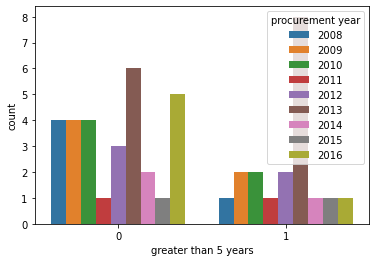

In [5]:
sns.countplot(x="greater than 5 years",hue="procurement year",data=es1)

In [6]:
es1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Machine/Spares        49 non-null     object
 1   Vendor name           49 non-null     object
 2   lifespan              49 non-null     int64 
 3   price                 49 non-null     int64 
 4   greater than 5 years  49 non-null     int64 
 5   procurement year      49 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.4+ KB


In [8]:
#data wrangling

#es1.isnull()

es1.isnull().sum()

Machine/Spares          0
Vendor name             0
lifespan                0
price                   0
greater than 5 years    0
procurement year        0
dtype: int64

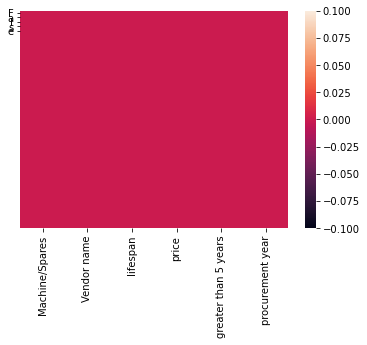

In [13]:
sns.heatmap(es1.isnull(),yticklabels='False')

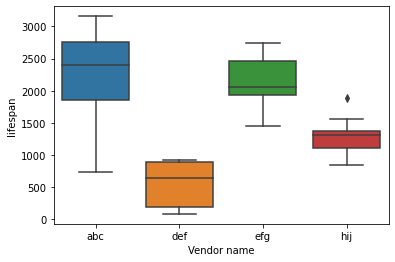

In [14]:
sns.boxplot(x="Vendor name",y="lifespan",data=es1)

In [16]:
es1.drop("Machine/Spares",axis=1,inplace=True)

In [17]:
es1.head()

,Vendor name,lifespan,price,greater than 5 years,procurement year
0,abc,1479,214151,0,2013
1,def,86,201187,0,2013
2,def,926,238283,0,2009
3,abc,3159,353452,1,2016
4,efg,2744,363646,1,2011


In [20]:
vendors=pd.get_dummies(es1["Vendor name"],drop_first=False)

In [21]:
vendors.head()

,abc,def,efg,hij
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [22]:
es1=pd.concat([es1,vendors],axis=1)

In [23]:
es1.drop(['Vendor name'],axis=1,inplace=True)

In [24]:
es1.head()

,lifespan,price,greater than 5 years,procurement year,abc,def,efg,hij
0,1479,214151,0,2013,1,0,0,0
1,86,201187,0,2013,0,1,0,0
2,926,238283,0,2009,0,1,0,0
3,3159,353452,1,2016,1,0,0,0
4,2744,363646,1,2011,0,0,1,0


In [25]:
X=es1.drop("greater than 5 years",axis=1)

y=es1['greater than 5 years']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

prediction = lr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

classification_report(y_test,prediction)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[10,  0],
       [ 0,  7]])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,prediction)

1.0